https://scikit-learn.org/stable/

###  ML project pipeline 
1. Data injection 
2. EDA
3. Preprocessing or feature engg
4. Model 
5. Evaluation of the Model 

# Linear regression

In [3]:
import pandas as pd
df = pd.read_csv("DATA\placement.csv")

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_10860\1330777497.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("DATA\placement.csv")


In [4]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Implementing Linear regression becouse the output will be Continuous variable.

* <b>Assumption.</b>
    * target variable and independent variable should have linear relationship.<br>
        - cgpa - independent feature 
        - package - target feture

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

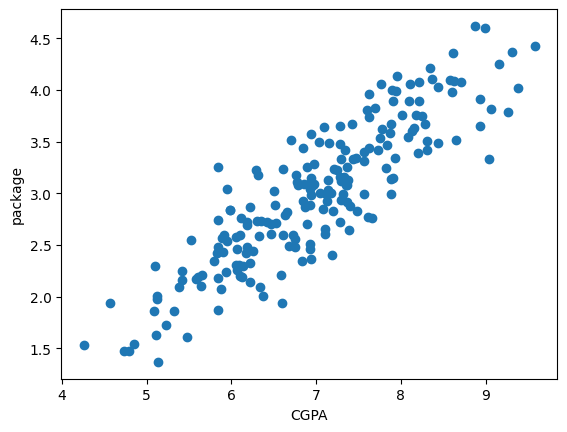

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("package")

Segregate X and y feature X means independent feature and Y means target feature.
<br>
Target feature comes inside the problem statement.



In [7]:
x = df.iloc[0:,0:1]

In [8]:
y = df.iloc[:,-1]

In [9]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [10]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [11]:
df.shape

(200, 2)

Train and Test split of data. using Sklearn<br> (Random sample)

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=45) 

Using random state we are fixing the values which are given by train and split. Every time we run the code. the train and test data will not change. And 45 means that till 45 refresh the split will not change.

Reason behind fixing the values. Because every time we run it,Accuracy of linear regression will change because of random sample. That's why we are fixing the values.

In [14]:
x_train

,cgpa
147,5.66
0,6.89
109,7.77
194,7.89
151,6.12
...,...
95,6.63
32,6.96
124,6.06
131,6.37


In [15]:
x_test.size

30

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.score(x_train,y_train)

0.7699940732625319

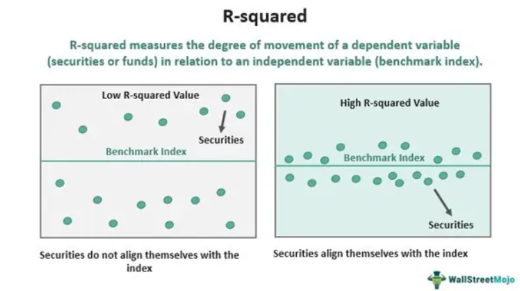   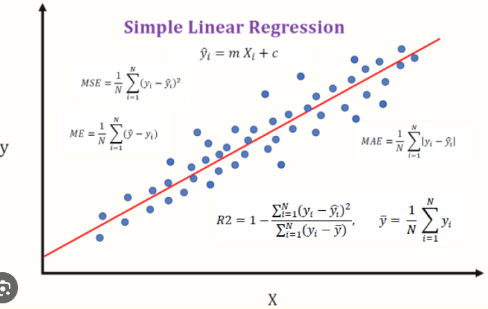

If we are getting R2 value year to one, that is best model. Value always lies between zero to one.(0-1)

# Prediction 

this is validation step<br>
here testing model on top of test data 

In [20]:
x_test

,cgpa
45,7.87
72,7.78
40,9.38
58,6.92
25,7.28
13,6.93
153,7.94
80,7.63
3,7.42
44,5.09


In [21]:
# this is bulk prediction 
y_pred = model.predict(x_test)

In [22]:
y_test

45     3.58
72     3.62
40     4.02
58     3.09
25     3.65
13     2.89
153    3.99
80     3.44
3      3.67
44     1.86
134    2.83
149    3.67
173    2.56
33     2.73
62     2.09
182    2.08
112    4.10
129    3.12
69     2.94
190    2.69
133    2.58
172    2.51
35     2.87
157    2.70
187    2.44
10     1.86
104    3.74
177    3.64
26     3.42
171    3.76
Name: package, dtype: float64

In [23]:
from sklearn.metrics import r2_score

In [24]:

model.coef_

array([0.56287985])

In [25]:
model.intercept_

-0.9400774248089303

formula = ( y = mx+c )
<br>
so we get <br>
y = 0.5628x - 0.9400

In [26]:
r2_score(y_test,y_pred)

0.8081093451562186

here the r2 scoere of train and test are near to each other so there is no overfitting


so our model is created. Now we can just give the CGPA and output will be package.<br>
this single value prediction 

In [27]:
model.predict([[7.8]])

c:\Users\Shubham\anaconda3\envs\ineuron\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.45038542])

In [28]:
model.predict([[9.8]])

c:\Users\Shubham\anaconda3\envs\ineuron\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.57614512])

y = 0.55*x-0.911 r2 line drown below

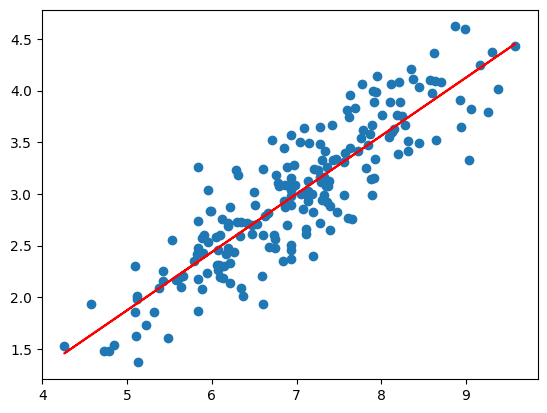

In [29]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,model.predict(x_train),color='red')

# Example 
low bias <br>
training : r2 score = 0.9 <br>

high varience <br>
testing : r2 score =  0.5 <br>

<b>there is overfitting</b><br>
<b>We can use regularization Technique</b>

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Multiple linear regression
when there are more than two independent features


In [30]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=150,n_features=2,n_targets=1,noise=40)


In [31]:
df = pd.DataFrame({'feature1':x[:,0],'feature2':x[:,1],'target':y})

In [32]:
df.head()

,feature1,feature2,target
0,0.873490,0.166339,-35.587585
1,-1.460606,0.746757,-138.016597
2,-0.359339,-0.766058,-74.155447
3,-0.304920,-0.248824,-3.654142
4,0.250553,1.173853,76.349122


In [33]:
df.shape

(150, 3)

In [34]:
import plotly.express as px


In [35]:
px.scatter_3d(df,x='feature1',y='feature2',z='target')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'feature1=%{x}<br>feature2=%{y}<br>target=%{z}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([ 0.87349028, -1.46060576, -0.35933933, -0.30492045,  0.25055338,
                           0.43651871,  1.54373224, -0.65476915, -1.07228359,  1.29256354,
                           2.44957722, -0.49071175,  0.14176142,  0.25246481, -0.02327405,
                          -1.44014479,  0.45397715,  0.29580588, -0.30641538,  0.94631696,
                           0.43197744,  1.98645278, -0.73584096, -0.59439483, -0.09768415,
                           0.29750253, -0.73636891,  0.63447242,  0.08203335,  0.15855622,
                          -0.22059613,  0.29398742, -0.07610844, -1.47966655, -1.56987264,
                           0.34169661,  0.35592372, -0.70012031,  1.53264275, -1.04882317,
                          -2.83022544,  0.89475358, -0.81713893,  0.63485595, -0.29213418,
                           0.91887496,  0.02896239, -1.63715572,  0.88532029,  0.10415063,
                          -0.29197348,  0.56733373, -1.68490225, -0.16637063, -1.05056162,
                           1.55997132, -1.03126529,  1.53107049, -1.01047844, -0.58577434,
                          -0.00682335,  0.26560171,  0.00979827, -1.568918  , -0.43333751,
                          -1.50626984, -1.76079236, -0.64485532, -0.59202193,  0.81767253,
                           1.31436008,  0.50996041, -0.40275471, -0.83754491,  0.2974298 ,
                          -0.29761459,  2.76434061,  0.04525556, -0.62071119, -0.59390028,
                          -0.18945087,  2.39962019,  0.41618575,  1.15715159, -1.12151715,
                           1.67803816, -0.57951285, -0.33301099, -0.13483916, -0.26193838,
                           0.55257943, -0.17829167, -0.61804332, -0.65993201,  0.7542069 ,
                          -2.02396499, -0.11829583,  0.44178638,  0.05286545, -0.47666432,
                           0.1617705 , -0.79513948,  0.41839893, -0.669163  ,  0.53503172,
                           2.87266411,  0.04489592, -0.1578178 ,  1.81856817, -0.92378377,
                          -0.83286625,  1.03373742,  0.35843901, -1.80425988, -0.49426109,
                          -0.09141847, -1.38018172,  0.18363265,  1.89794691, -0.76052268,
                           0.62587875,  1.71389558,  0.4112339 ,  0.64346163,  1.0490443 ,
                           0.68329902, -0.81550781,  0.3509847 ,  0.09961484, -0.6730971 ,
                          -0.07606213, -0.81421722, -1.16984911, -0.78444471,  0.10621462,
                          -0.59419842,  1.35139148,  1.00184344,  1.7280425 , -0.23221804,
                          -0.13009973, -0.68126878, -0.08184144, -0.20339771, -0.34344819,
                          -1.49798277, -0.87212797, -0.33159305, -0.51555263, -0.40750355]),
              'y': array([ 0.16633934,  0.74675683, -0.76605764, -0.24882435,  1.17385337,
                          -0.61665925, -0.78734645,  0.72091647,  0.86705193,  1.19289942,
                          -1.02761587, -0.21981522,  0.3082522 ,  0.71062263, -1.99434277,
                           0.33420455,  1.59583462,  0.81153634, -2.87244089,  1.16806652,
                          -1.5287961 , -0.25828784, -0.14671383, -0.63549338,  1.04580911,
                           0.25834713,  0.63724593,  0.08793541,  0.85402099, -0.54784886,
                          -1.70421879,  2.09670076, -0.53341857,  0.72427104, -0.74684439,
                          -1.32081584, -0.74149242, -0.03671964, -0.21272674,  1.21595924,
                          -0.69282158, -0.11135977,  0.07639482,  0.26510558, -0.62682609,
                          -0.04875086,  2.11004904,  1.38576714, -0.32658604, -0.4109

In [36]:
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

In [37]:
x_train.shape

(127, 2)

In [38]:
y_train.shape

(127,)

In [39]:
model2=LinearRegression()

In [40]:
model2.fit(x_train,y_train)

LinearRegression()

# Prediction

In [41]:
model2.score(x_train,y_train)

0.7024181201449375

In [42]:
y_pred2 = model2.predict(x_test)

In [43]:
r2_score(y_test,y_pred2)

0.8083800196539475

In [44]:
model2.coef_

array([37.40294427, 61.33086459])

In [45]:
model2.intercept_

1.383233091455769

y=m1x1+m2x2+c<br>
y=theta1x1+theta2x2+c

y=83.06(x1)+89.76(x2)-3.56

To find the loss between y_test and y_pred as below

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

we need to pass y_test and y_pred y_test is actual value and y_pred is predicted value

In [47]:
mean_squared_error(y_test,y_pred2) # this is validation LOSS

1395.4888404809194

In [48]:
mean_absolute_error(y_test,y_pred2) 

27.9669402425905

# Ridge Regression:-  L2 regularization   (used to reduce over fitting)

In [49]:
from sklearn.datasets import load_diabetes

In [50]:
data = load_diabetes()

In [51]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [54]:
x = data.data

In [55]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [56]:
y = data.target

In [57]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)

In [59]:
x_train

array([[-0.08906294, -0.04464164, -0.01159501, ...,  0.03430886,
         0.02268774, -0.00936191],
       [-0.03457486, -0.04464164, -0.0374625 , ..., -0.00259226,
        -0.03074792, -0.07149352],
       [ 0.01628068,  0.05068012, -0.04500719, ..., -0.03949338,
        -0.03074792,  0.03620126],
       ...,
       [ 0.01628068, -0.04464164,  0.02612841, ..., -0.03395821,
        -0.05140387, -0.02593034],
       [-0.09632802, -0.04464164, -0.06979687, ..., -0.03949338,
        -0.04688253, -0.07977773],
       [ 0.08166637,  0.05068012,  0.00672779, ...,  0.09187461,
         0.05471997,  0.00720652]])

In [60]:
y_train

array([206., 128., 102.,  88., 346., 268., 198.,  96.,  78.,  87., 170.,
       292., 161., 118., 202.,  53., 103., 129.,  95., 179.,  89.,  68.,
       151., 275.,  90., 281., 150., 111., 116.,  66., 208., 173., 262.,
       110.,  94., 113.,  83., 190.,  96., 303.,  73., 293., 275., 197.,
       221., 237.,  50., 142., 200., 151., 109.,  70., 152., 261., 308.,
       195., 129., 214., 122.,  95., 259.,  63., 104., 143.,  78., 317.,
       281., 173.,  93., 272., 129.,  77.,  75.,  87., 139., 310., 233.,
        88., 263.,  59., 265., 199., 236., 103., 179., 210., 168., 123.,
       128.,  47., 277.,  60.,  85., 237., 192., 230., 225., 235., 241.,
        55., 295., 257.,  71., 110., 189., 151.,  58.,  97., 229., 120.,
       280., 332.,  49., 201.,  54., 288., 259., 146., 154., 336., 166.,
       258., 219.,  97., 124., 296., 275., 279.,  81., 170.,  52., 197.,
       297., 121., 178., 170., 109.,  77.,  65.,  71.,  47., 111., 100.,
        91.,  94., 104., 150., 152.,  44., 104.,  8

In [62]:
model3 = LinearRegression()

In [63]:
model3.fit(x_train,y_train)

LinearRegression()

In [68]:
model3.score(x_train,y_train)

0.5159857758740993

for training the score is 0.515

In [65]:
y_pred3 = model3.predict(x_test)

In [66]:
r2_score(y_test,y_pred3)

0.5188113124539249

fro training the score is 0.518

In [69]:
from sklearn.linear_model import Ridge

In [70]:
model4 = Ridge()

In [72]:
model4.fit(x_train,y_train)

Ridge()

In [73]:
model4.score(x_train,y_train)

0.43493675504046037

In [75]:
y_pred4 = model4.predict(x_test)

In [76]:
r2_score(y_test,y_pred4)

0.45671008338777064

In [87]:
model5=Ridge(alpha=0.5)

In [88]:
model5.fit(x_train,y_train)

Ridge(alpha=0.5)

In [89]:
model5.score(x_train,y_train)

0.47765022321720374

In [90]:
y_pred5 = model5.predict(x_test)

In [91]:
r2_score(y_test,y_pred5)

0.4937786896097931

In [92]:
model5.coef_

array([  40.26561106, -116.44878825,  356.51433578,  241.36685429,
        -22.40074848,  -61.54304065, -171.38192257,  127.41712962,
        309.39816313,  126.97879692])

In [94]:
model5.intercept_

152.12139754409014

[22.0977619]
-1.9244850144323262


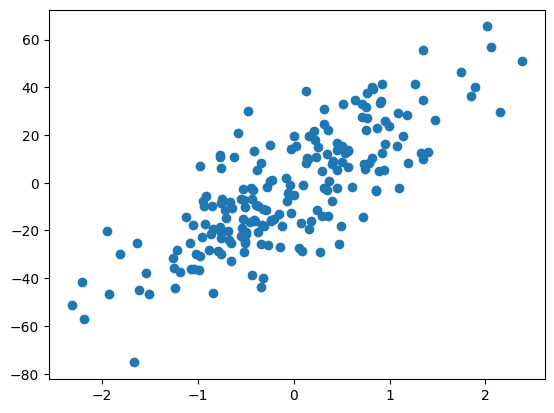

In [113]:
x,y = make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=15,random_state=13)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
plt.scatter(x,y)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.coef_)
print(reg.intercept_)

In [114]:
reg.score(x_train,y_train)

0.619375899696492

In [115]:
pred = reg.predict(x_test)

In [116]:
r2_score(y_test,pred)

0.6469903337608505

In [117]:
reg.score(x_train,y_train)

0.619375899696492

In [118]:
reg.predict(x_test)

array([-17.85696413,  -7.50455855,  22.25654558,  -8.07063534,
       -44.44410237,  19.13093896,  27.47254161,  13.78646672,
        19.18432895,  -1.97727713, -14.69349235,   8.03124571,
       -25.94876495, -18.66303373,  15.00043499,  -4.61480871,
       -19.04273798,  -3.19582202, -38.70082748,  18.26713952,
        -9.46249944, -42.1075286 ,   5.83981839,  10.51316923,
        20.01746835, -25.2300482 ,  14.73206495, -18.90942191,
         6.02037405,   2.16240656,  12.21551867,  17.78217013,
         0.3133506 ,  14.75280658, -35.93435748,  14.59075455,
         6.9295063 ,  -7.06057659,  15.50115767,  43.45753913])

# Lasso Regression

In [119]:
from sklearn.linear_model import Lasso

In [120]:
model7 = Lasso()

In [121]:
model7.fit(x_train,y_train)

Lasso()

In [122]:
model7.score(x_train,y_train)

0.6171252806956098

In [123]:
pred7 = model7.predict(x_test)

In [124]:
r2_score(y_test,pred7)

0.644307685322716

# Elastic Regression

In [125]:
from sklearn.linear_model import ElasticNet

In [126]:
model8 = ElasticNet()

In [127]:
model8.fit(x_train,y_train)

ElasticNet()

In [128]:
model8.score(x_train,y_train)

0.5112281515462477

In [130]:
y_pred8 = model8.predict(x_test)

In [131]:
r2_score(y_test,y_pred8)

0.5256345148586415

In [132]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
x,y = make_regression(n_features=2,random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(x,y)



ElasticNet(random_state=0)

In [133]:
regr.coef_

array([18.83816048, 64.55968825])

In [134]:
regr.intercept_

1.4512607561653996